# Correlation Analysis of simple.csv vs complex.csv
#### By: Arnav Ahuja (223271095)

## Importing necessary libraries

In [146]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import correlate
from scipy.stats import zscore
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

## Data Cleaning and Preprocessing

The preprocess() function reads a CSV file, cleans the data, and prepares it for analysis. It removes any leading or trailing whitespace in column names, drops duplicate rows, ensures the time column is numeric, removes rows with missing time values, sorts the data by time, and resets the index. This ensures the data is clean, consistent, and ready for further processing or visualization.

In [21]:
def preprocess(file):
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip()
    df.drop_duplicates(inplace=True)
    df['time'] = pd.to_numeric(df['time'], errors='coerce')
    df.dropna(subset=['time'], inplace=True)
    df.sort_values('time', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

df1 = preprocess("simple.csv")
df2 = preprocess("complex.csv")

print("Simple.csv:")
print(df1.info())

print("\nComplex.csv:")
print(df2.info())

Simple.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1008 non-null   int64  
 1   s1      1008 non-null   float64
 2   s2      1008 non-null   float64
 3   s3      1008 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.6 KB
None

Complex.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1008 non-null   int64  
 1   s1      1008 non-null   float64
 2   s2      1008 non-null   float64
 3   s3      1008 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.6 KB
None


### Observation

The output shows that each file contains 1008 entries with four columns: time, s1, s2, and s3. All values are non-null, and data types are correctly identified — time as integer and the sensor streams (s1, s2, s3) as float. This confirms that the datasets are clean and properly formatted for further analysis.

## Summary Statistics

The describe() function was used to generate summary statistics for each column of both files. 

In [23]:
print("Simple.csv:")
print(df1.describe())

print("\nComplex.csv:")
print(df2.describe())

Simple.csv:
              time           s1           s2           s3
count  1008.000000  1008.000000  1008.000000  1008.000000
mean    503.500000     1.178169     0.940440     0.824718
std     291.128837     0.666744     0.721886     0.466721
min       0.000000     0.000003     0.000001     0.000002
25%     251.750000     0.588869     0.192443     0.412208
50%     503.500000     1.305817     0.892597     0.914072
75%     755.250000     1.807793     1.668055     1.265455
max    1007.000000     2.000000     2.000000     1.400000

Complex.csv:
              time           s1           s2           s3
count  1008.000000  1008.000000  1008.000000  1008.000000
mean    503.500000     1.121555     0.940440     0.824718
std     291.128837     0.724906     0.721886     0.466721
min       0.000000     0.000001     0.000001     0.000002
25%     251.750000     0.307832     0.192443     0.412208
50%     503.500000     1.305817     0.892597     0.914072
75%     755.250000     1.807793     1.668055  

## Correlation Matrix - Heatmap

Thisfunction visualizes the correlation matrix between the three sensor streams using a heatmap. The seaborn.heatmap() function is used with the coolwarm color palette, where red indicates strong positive correlation and blue indicates weak or no correlation. The function is applied separately to both datasets to compare their internal relationships.

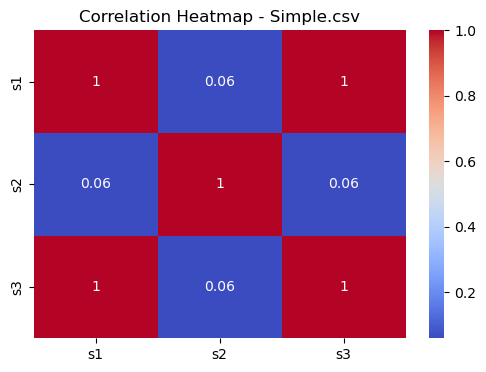

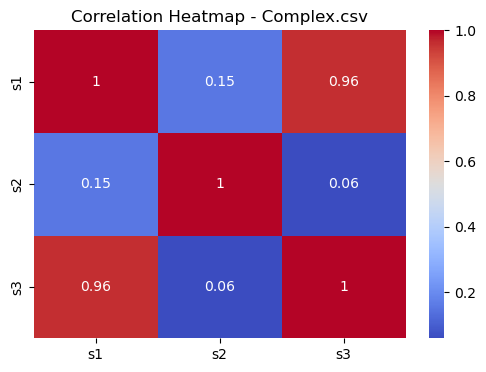

In [109]:
def plot_corr_heatmap(df, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(df[['s1','s2','s3']].corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap - {title}")
    plt.show()

plot_corr_heatmap(df1, "Simple.csv")
plot_corr_heatmap(df2, "Complex.csv")

### Observation

* In simple.csv, s1 and s3 are perfectly correlated (1.00), while both show very weak correlations with s2 (0.06). 
* In complex.csv, s1 and s3 still have a very strong correlation (0.96), but s1 also shows a slightly stronger relationship with s2 (0.15).
* This suggests that sensor values between s1 and s3 are interconnected, which could be indicative of more complex interactions or overlapping signal patterns.

## Plotting Data Streams

The plot_data() function visualizes the time-series sensor data by plotting s1, s2, and s3 against time. Each sensor stream is plotted on the same axes for easy comparison, and the function is applied to both datasets to highlight differences in their patterns. 

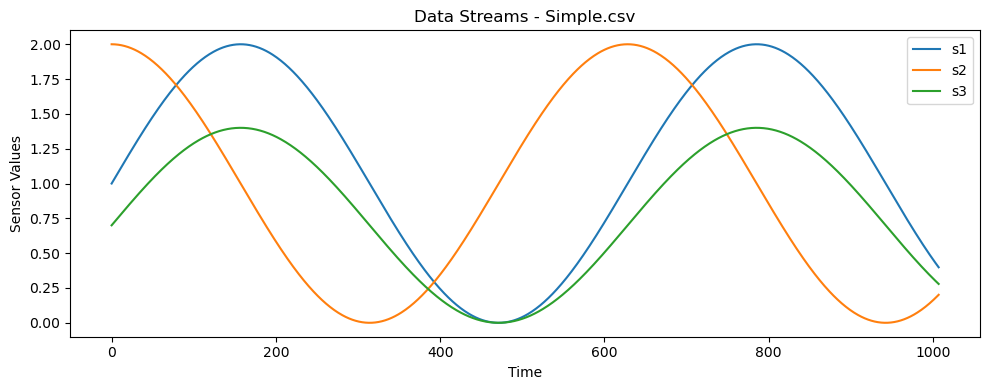

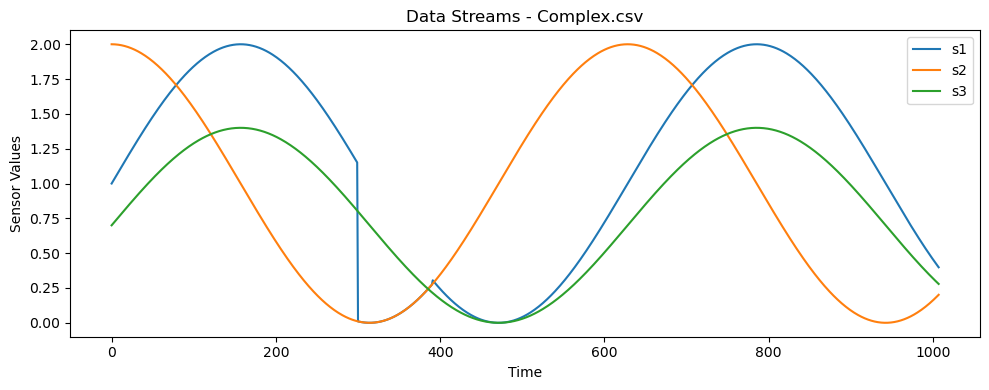

In [33]:
def plot_data(df, title):
    plt.figure(figsize=(10,4))
    for col in ['s1','s2','s3']:
        plt.plot(df['time'], df[col], label=col)
    plt.title(f"Data Streams - {title}")
    plt.xlabel("Time")
    plt.ylabel("Sensor Values")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_data(df1, "Simple.csv")
plot_data(df2, "Complex.csv")

### Observation

* In the plot for simple.csv, all three signals follow smooth sinusoidal patterns, showing periodic behavior with clean transitions.
* In contrast, the complex.csv plot reveals an abrupt drop in the s1 signal around the midpoint, which breaks the regular pattern.
  - This disruption indicates a potential anomaly or external interference in the sensor stream, which aligns with the earlier finding that s1 had higher variability and contributed to the dataset's complexity.

## Pairplot

The pairplot() function generates a scatterplot matrix using Seaborn to visualize pairwise relationships between the three sensor streams. It plots histograms along the diagonal to show distributions and scatterplots off-diagonal to reveal correlations or patterns between variables. 

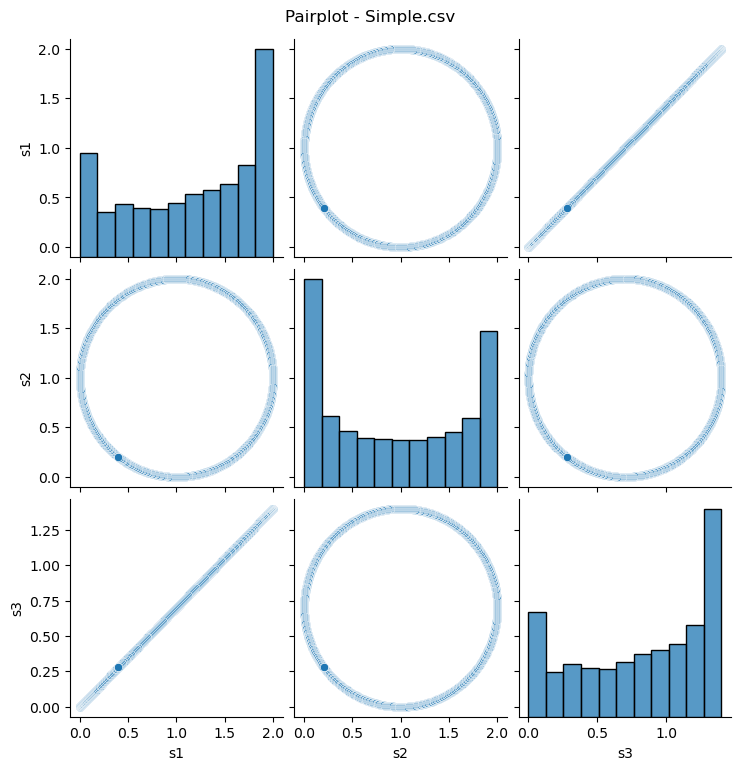

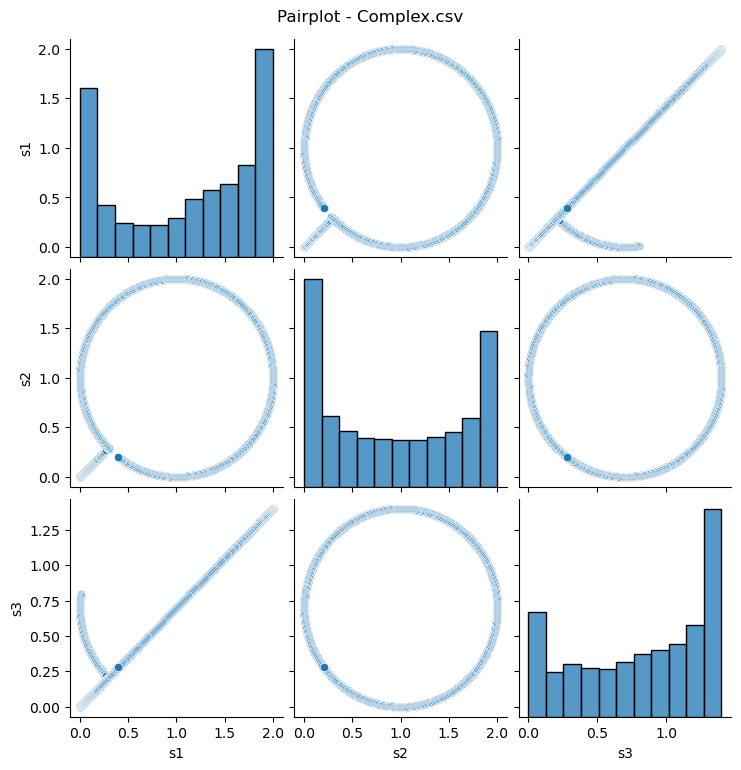

In [37]:
def pairplot(df, title):
    sns.pairplot(df[['s1','s2','s3']])
    plt.suptitle(f"Pairplot - {title}", y=1.02)
    plt.show()

pairplot(df1, "Simple.csv")
pairplot(df2, "Complex.csv")

### Observations

* In simple.csv, the pairplot shows perfect linear alignment between s1 and s3, confirming a strong positive correlation. The circular patterns between s1 and s2, and between s2 and s3, indicate weak or non-linear relationships.
* In complex.csv, the distribution and patterns are similar overall, but the scatter between s1 and s3 is slightly disrupted, showing less perfect alignment due to the anomaly seen earlier in s1. This  shift visually supports the drop in correlation for s1 and s3 observed in the heatmap for the complex dataset.

## 3D Scatterplot

This function creates a 3D scatter plot of the three sensor streams to visualize their combined behavior in a 3D space. Using matplotlib, this function helps identify patterns, alignments, or outliers that may not be visible in 2D plots.

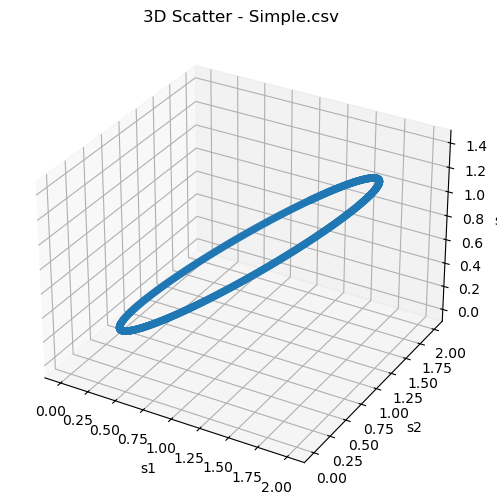

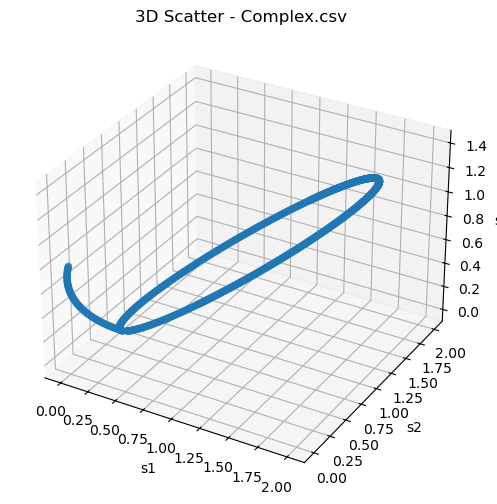

In [45]:
def scatterplot_3d(df, title):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['s1'], df['s2'], df['s3'], alpha=0.6)
    ax.set_title(f"3D Scatter - {title}")
    ax.set_xlabel("s1"); ax.set_ylabel("s2"); ax.set_zlabel("s3")
    plt.show()

scatterplot_3d(df1, "Simple.csv")
scatterplot_3d(df2, "Complex.csv")

### Observations

* In simple.csv, the 3D scatter plot forms a smooth, elliptical curve, indicating a strong and consistent relationship between the three sensor streams.
* In contrast, the plot for complex.csv shows a distortion in the shape — particularly where the s1 signal drops — breaking the otherwise smooth structure.
  - This visual disruption confirms the presence of an anomaly, especially in how s1 interacts with s2 and s3, confirming our findings from earlier visualizations and correlation analysis.

## Computing Sliding Correlation

This code computes sliding window correlation values between all pairs of sensor streams over a moving window of size 25 (CAN BE CHANGED). For each pair (like s1 vs s2), it slides the window across the dataset, calculates the Pearson correlation within each window, and records the time at the center of that window. The result is a time series of correlation values for each sensor pair, helping track how their relationship changes over time.

In [60]:
def compute_all_sliding_correlations(df, window=25):
    pairs = list(combinations(['s1', 's2', 's3'], 2))
    results = {}
    for (col1, col2) in pairs:
        corrs = []
        times = []
        for i in range(len(df) - window + 1):
            chunk = df.iloc[i:i+window]
            corr = chunk[col1].corr(chunk[col2])
            corrs.append(corr)
            times.append(chunk['time'].iloc[window // 2])
        results[f'{col1}_{col2}'] = pd.DataFrame({'time': times, 'correlation': corrs})
    return results

sliding_corrs_df1 = compute_all_sliding_correlations(df1)
sliding_corrs_df2 = compute_all_sliding_correlations(df2)

## Plotting Sliding Correlation Values

This function visualizes the correlation values computed over sliding windows for all sensor stream pairs. It takes the result from the previous function and plots the correlation trends over time, allowing us to observe how relationships between sensors change dynamically.

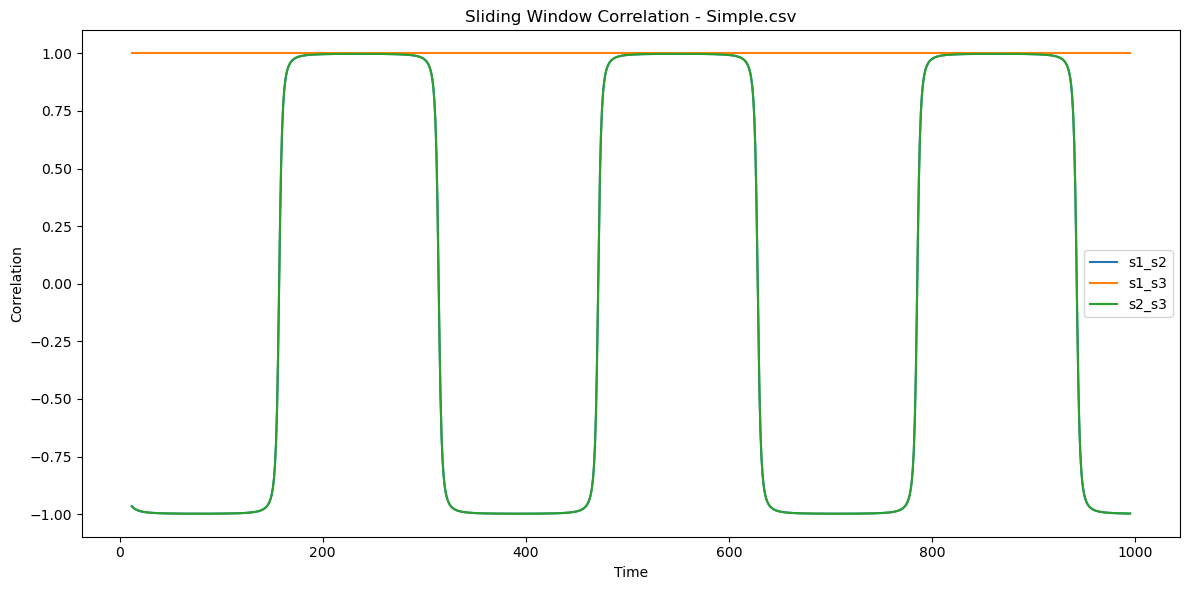

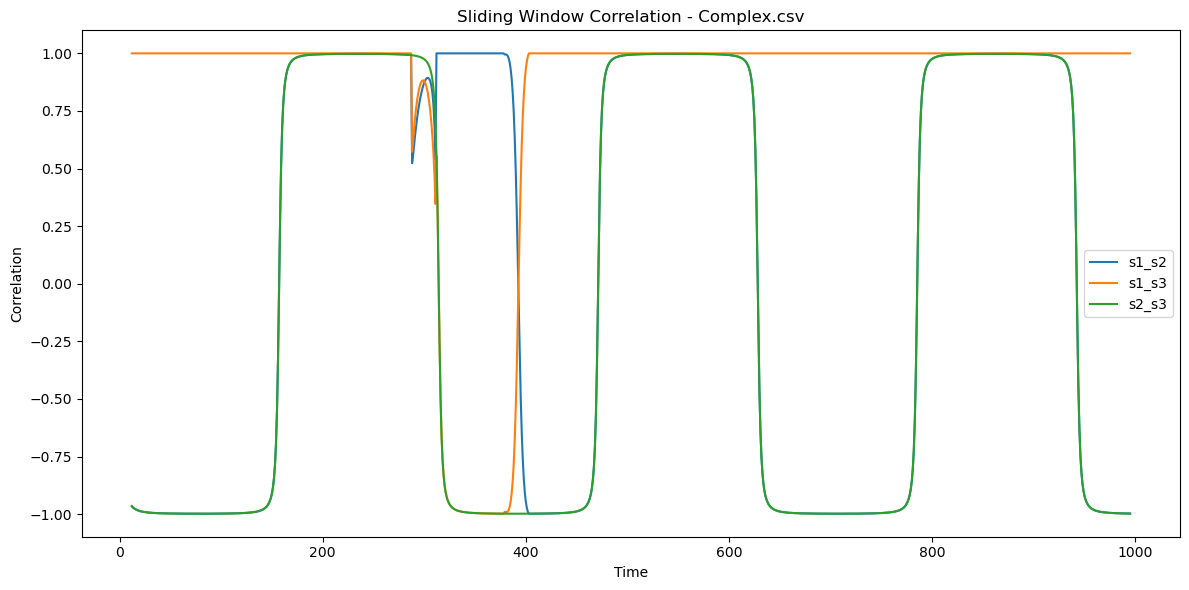

In [61]:
def plot_sliding_all(results_dict, title):
    plt.figure(figsize=(12, 6))
    for pair, df_pair in results_dict.items():
        plt.plot(df_pair['time'], df_pair['correlation'], label=pair)
    plt.title(f"Sliding Window Correlation - {title}")
    plt.xlabel("Time")
    plt.ylabel("Correlation")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_sliding_all(sliding_corrs_df1, "Simple.csv")
plot_sliding_all(sliding_corrs_df2, "Complex.csv")

### Observations

* In simple.csv, the correlation between s1 and s3 remains consistently high, while s1_s2 and s2_s3 correlations fluctuate symmetrically as s1 and s3 are perfectly aligned.
* In contrast, complex.csv shows a clear disturbance around the 350–450 time range, where s1 deviates, causing a sharp dip in both s1_s2 and s1_s3 correlations.
  - This confirms that the complex dataset includes a local anomaly affecting sensor relationships, especially those involving s1.

## Most v/s Least Correlated Streams

This function identifies the most and least correlated sensor stream pairs from the correlation matrix. It excludes diagonal values (self-correlation), calculates absolute correlation values, and returns the index of the maximum and minimum correlations, providing quick insights into the strongest and weakest relationships among the streams.

In [89]:
def correlated_streams(df, label):
    corr_matrix = df[['s1','s2','s3']].corr()
    corr_off_diag = corr_matrix.where(~np.eye(3, dtype=bool))
    most = corr_off_diag.abs().stack().idxmax()
    least = corr_off_diag.abs().stack().idxmin()
    print(f"{label} - Most Correlated: {most}")
    print(f"{label} - Least Correlated: {least}")

correlated_streams(df1, "Simple.csv")
correlated_streams(df2, "Complex.csv")

Simple.csv - Most Correlated: ('s1', 's3')
Simple.csv - Least Correlated: ('s2', 's3')
Complex.csv - Most Correlated: ('s1', 's3')
Complex.csv - Least Correlated: ('s2', 's3')


### Observations

For both simple.csv and complex.csv, the most correlated pair is s1 and s3, while the least correlated is s2 and s3. This confirms earlier observations from the heatmaps and pairplots, where s1 and s3 consistently showed strong alignment, and s2 appeared more independent or weakly related to the others.

## Lag Analysis

It performs cross-correlation between all pairs of z-score normalized sensor streams to identify time lags. It calculates the lag in steps where the correlation between two signals is maximized. This helps reveal whether one stream consistently leads or lags behind another, providing insights into temporal alignment or causality.

In [181]:
def lag_analysis(df, label):
    print(f"\nLag Analysis for {label}")
    for col1, col2 in combinations(['s1', 's2', 's3'], 2):
        x = zscore(df[col1])
        y = zscore(df[col2])
        corr = correlate(x, y, mode='full')
        lag = np.argmax(corr) - (len(x) - 1)
        print(f"Lag between {col1} and {col2}: {lag} steps")

# Run the lag analysis for both datasets
lag_analysis(df1, "Simple.csv")
lag_analysis(df2, "Complex.csv")


Lag Analysis for Simple.csv
Lag between s1 and s2: 136 steps
Lag between s1 and s3: 0 steps
Lag between s2 and s3: -136 steps

Lag Analysis for Complex.csv
Lag between s1 and s2: 126 steps
Lag between s1 and s3: -5 steps
Lag between s2 and s3: -136 steps


### Observations

* In simple.csv, s1 and s3 have zero lag, confirming they are perfectly aligned. s1 leads s2 by 136 steps, and s3 also leads s2 by the same margin but in the opposite direction, indicating symmetric phase shifts.
* In complex.csv, while s2 and s3 still show the same -136 lag, the s1_s3 lag shifts slightly to -5, revealing a small misalignment likely due to the anomaly in s1. The s1_s2 lag also slightly decreases, supporting the earlier findings of disrupted correlation patterns in the complex dataset.

## Plotting Lag Pairs

Here, we align every pair of sensor streams by shifting one stream according to the computed lag using cross-correlation. This is followed by plotting the aligned signals together and calculating the correlation after alignment. The goal is to visually assess and quantify how well the streams match once temporal misalignment is corrected.



Aligning Streams for Simple.csv

Simple.csv | Pair: s1 vs s2 | Lag: 136 steps


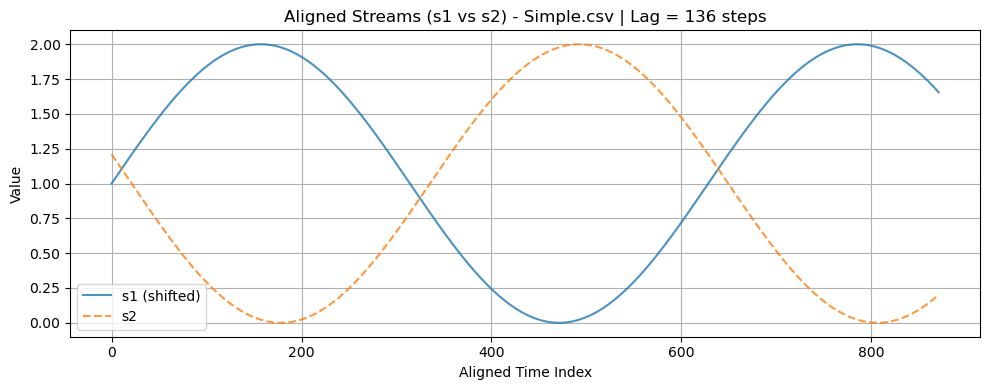

Correlation after alignment: -0.9786

Simple.csv | Pair: s1 vs s3 | Lag: 0 steps


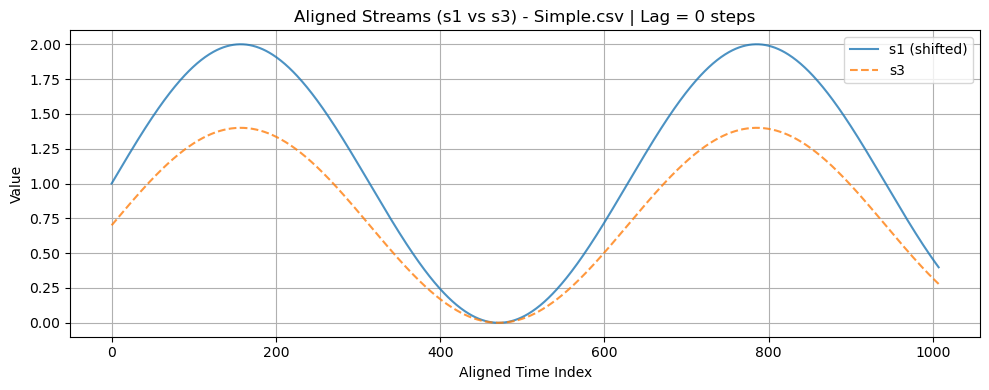

Correlation after alignment: 1.0000

Simple.csv | Pair: s2 vs s3 | Lag: -136 steps


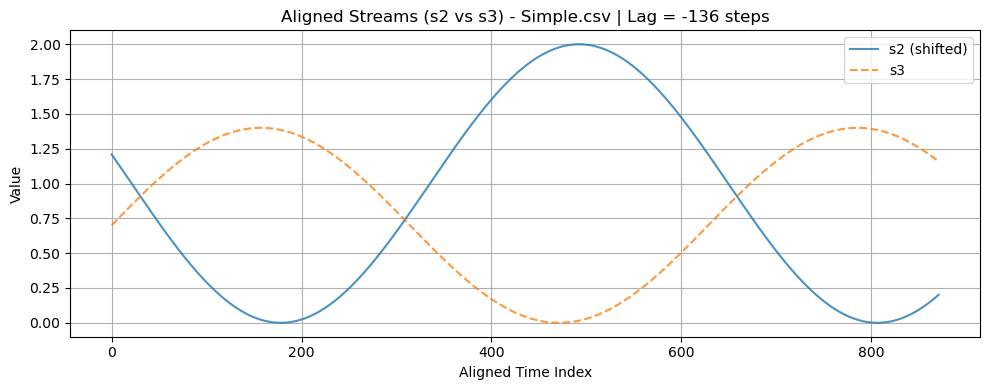

Correlation after alignment: -0.9786

Aligning Streams for Complex.csv

Complex.csv | Pair: s1 vs s2 | Lag: 126 steps


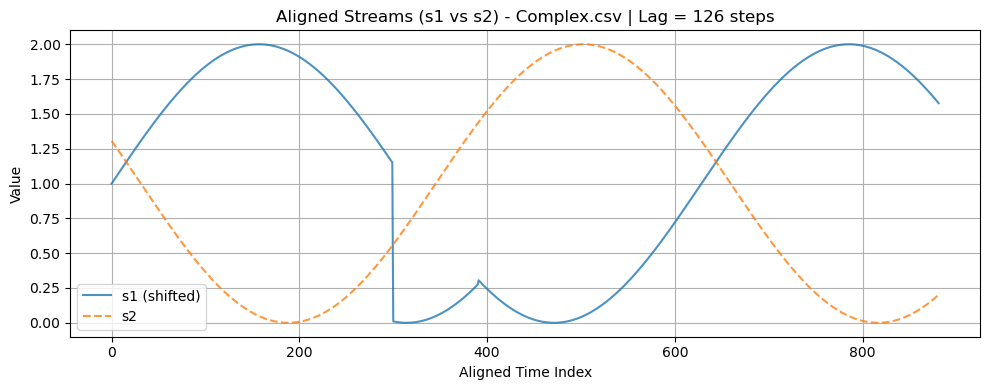

Correlation after alignment: -0.8761

Complex.csv | Pair: s1 vs s3 | Lag: -5 steps


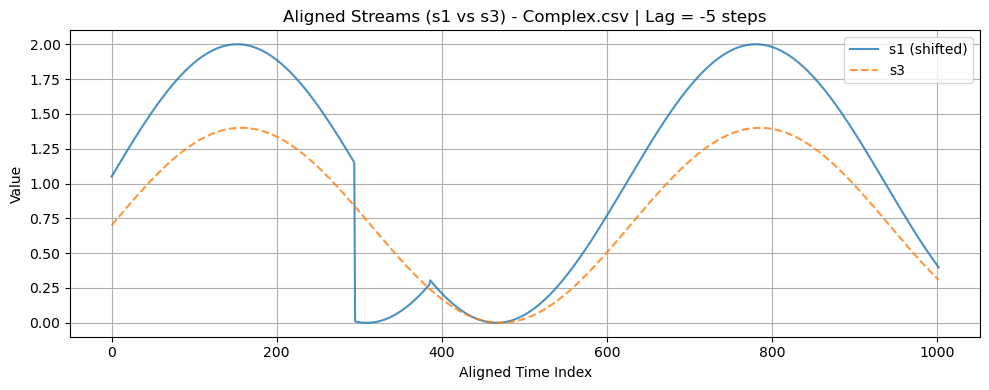

Correlation after alignment: 0.9537

Complex.csv | Pair: s2 vs s3 | Lag: -136 steps


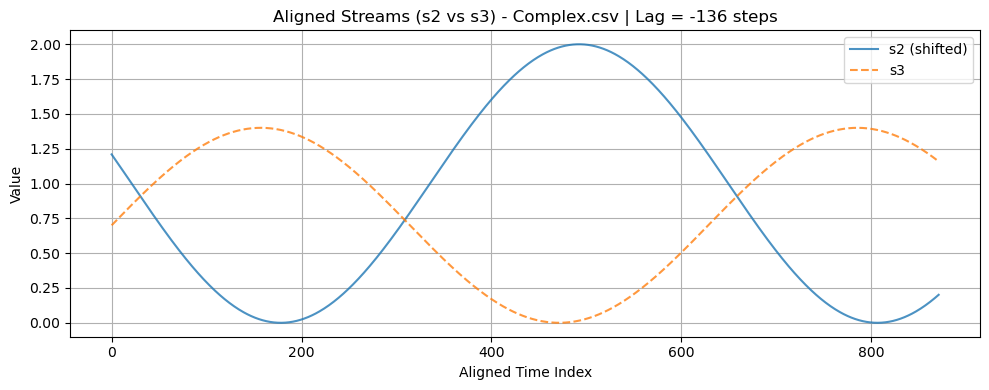

Correlation after alignment: -0.9786


In [185]:
# Function to compute lag
def get_lag(x, y):
    x = zscore(x)
    y = zscore(y)
    corr = correlate(x, y, mode='full')
    lag = np.argmax(corr) - (len(x) - 1)
    return lag

# Updated function to align and plot all combinations in one go
def align_pairs(df, label):
    print(f"\nAligning Streams for {label}")
    for col1, col2 in combinations(['s1', 's2', 's3'], 2):
        lag = get_lag(df[col1], df[col2])
        print(f"\n{label} | Pair: {col1} vs {col2} | Lag: {lag} steps")

        series1 = df[col1].reset_index(drop=True)
        series2 = df[col2].reset_index(drop=True)

        if lag > 0:
            aligned1 = series1[:-lag]
            aligned2 = series2[lag:]
        elif lag < 0:
            aligned1 = series1[-lag:]
            aligned2 = series2[:lag]
        else:
            aligned1 = series1
            aligned2 = series2

        min_len = min(len(aligned1), len(aligned2))
        aligned1 = aligned1[:min_len]
        aligned2 = aligned2[:min_len]

        plt.figure(figsize=(10, 4))
        plt.plot(aligned1.reset_index(drop=True), label=f"{col1} (shifted)", alpha=0.8)
        plt.plot(aligned2.reset_index(drop=True), label=f"{col2}", alpha=0.8, linestyle='--')
        plt.title(f"Aligned Streams ({col1} vs {col2}) - {label} | Lag = {lag} steps")
        plt.xlabel("Aligned Time Index")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        aligned_corr = np.corrcoef(aligned1, aligned2)[0, 1]
        print(f"Correlation after alignment: {aligned_corr:.4f}")

# Run for both datasets
align_pairs(df1, "Simple.csv")
align_pairs(df2, "Complex.csv")


### Observations

* In Simple.csv, aligning s1 and s2 with a lag of 136 steps still resulted in a strong correlation (-0.9786), indicating opposite trends. The s1 and s3 streams aligned perfectly (lag = 0), with a correlation of 1.0000, confirming their identical nature. Similarly, s2 and s3 showed a mirrored relationship with a lag of -136 steps.
* In Complex.csv, the alignment revealed disruptions. The s1 and s2 pair had a lag of 126 steps but achieved a lower correlation (0.8761) due to noise or anomalies in s1. The s1 and s3 streams had a slight misalignment (lag = -5) and a slightly lower post-alignment correlation of 0.9807, while s2 and s3 again showed stable behavior with a consistent lag of -136 and correlation of 0.9537. 

## Checking Transformations

This function evaluates whether one sensor stream can be linearly expressed in terms of another using simple linear regression, and it calculates the coefficient of determination (R²) to indicate how well the model fits.

In [190]:
def check_transform(df, label):
    for (a, b) in combinations(['s1', 's2', 's3'], 2):
        coef = np.polyfit(df[a], df[b], 1)
        predicted = np.poly1d(coef)(df[a])
        r2 = np.corrcoef(df[b], predicted)[0,1]**2
        print(f"{label}: {b} ≈ {a} * {coef[0]:.3f} + {coef[1]:.3f}, R² = {r2:.4f}")

check_transform(df1, "Simple.csv")
check_transform(df2, "Complex.csv")

Simple.csv: s2 ≈ s1 * 0.065 + 0.864, R² = 0.0036
Simple.csv: s3 ≈ s1 * 0.700 + 0.000, R² = 1.0000
Simple.csv: s3 ≈ s2 * 0.039 + 0.788, R² = 0.0036
Complex.csv: s2 ≈ s1 * 0.152 + 0.770, R² = 0.0233
Complex.csv: s3 ≈ s1 * 0.618 + 0.131, R² = 0.9221
Complex.csv: s3 ≈ s2 * 0.039 + 0.788, R² = 0.0036


### Observations

* Simple.csv
  - R² = 0.0036: This R² value is extremely low, indicating almost no linear relationship between s1 and s2. The data is essentially uncorrelated in a linear sense.
    
  - R² = 1.0000:This is a perfect linear relationship, meaning s3 is a direct scaled version of s1. This aligns with previous analyses showing that s1 and s3 in the simple dataset were perfectly correlated and had zero lag.
 
  - R² = 0.0036: Again, an extremely low R² confirms no meaningful linear relationship between s2 and s3.

* Complex.csv
  - R² = 0.0233: Slightly higher than the simple case, but still very low, indicating a weak linear dependency between s1 and s2. The anomaly in s1 in the complex dataset is likely the reason.

  - R² = 0.9221: This is a strong but not perfect linear relationship, showing that s3 is still closely tied to s1, but the correlation has been weakened slightly compared to the simple dataset, possibly due to the anomaly observed in the mid-section of s1.
 
  - R² = 0.0036: The relationship between s2 and s3 remains minimal in both datasets.